In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Rendy\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
x = pd.read_csv('train_values.csv')
y = pd.read_csv('train_labels.csv')

display(x.head())
display(y.head())

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [5]:
df = x.merge(y, how = 'inner', on = 'building_id')


In [6]:
df.columns[df.isnull().any()]


Index([], dtype='object')

In [7]:
#Checking for duplicates
print('Shape before dropping duplicates', df.shape)
df.drop_duplicates(subset='building_id', keep='last')
print('Shape after dropping duplicates', df.shape)

Shape before dropping duplicates (260601, 40)
Shape after dropping duplicates (260601, 40)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [9]:
df.select_dtypes(include=['int64']).columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other', 'damage_grade'], dtype='object')

In [10]:
df.select_dtypes(include=['category', object]).columns

Index(['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status'], dtype='object')

In [11]:
#Change the damage grade column to type catgory
df['damage_grade'] = df['damage_grade'].astype('category')

In [12]:
df.damage_grade.unique()


[3, 2, 1]
Categories (3, int64): [3, 2, 1]

In [13]:
#Creating a categorial name for the damage_grade column
damage_map = {1: 'Low', 2: 'Medium', 3: 'High'}
df['damage_grade'] = df['damage_grade'].map(damage_map)

# Exploratory Data Analysis¶


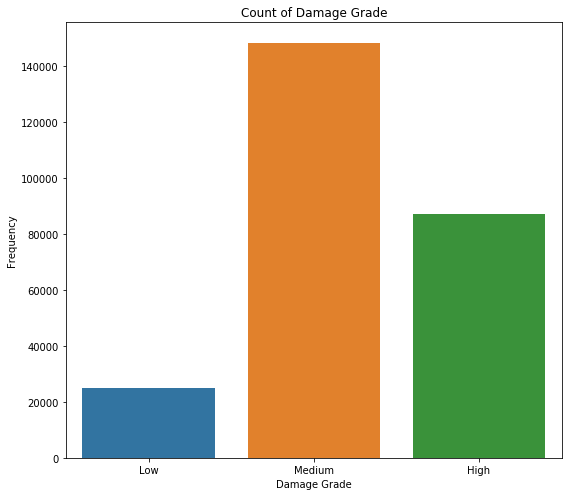

In [14]:
plt.figure(figsize = (8,7))
sns.countplot(x='damage_grade',data=df)
plt.xlabel('Damage Grade')
plt.ylabel('Frequency')
plt.title('Count of Damage Grade')
plt.tight_layout()

**take a look at the the taret variable and the other independent variables**

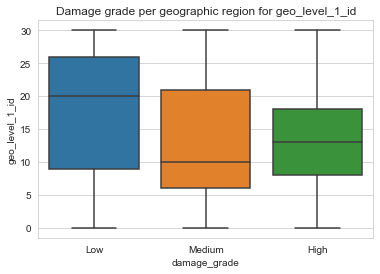

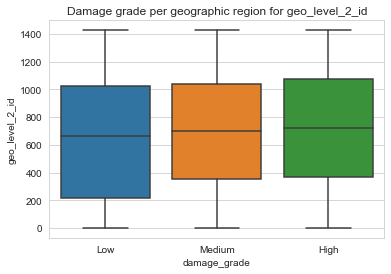

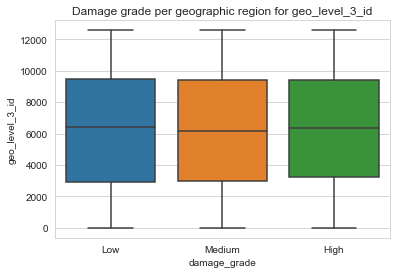

In [15]:
def plot_box(df, cols, col_x = 'damage_grade'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.title('Damage grade per geographic region for ' + str(col))
        plt.show()
        

num_cols = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']
plot_box(df, num_cols)

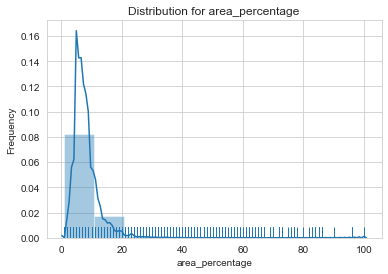

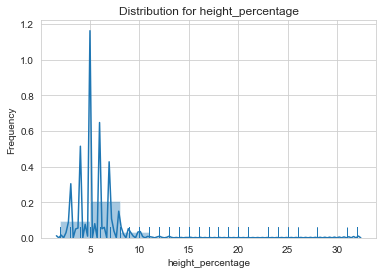

In [16]:
column=['area_percentage', 'height_percentage']
def distplot(df, column, bins = 10, hist = False):
    for col in column:
        sns.distplot(df[col], bins=bins, rug=True, hist=hist)
        plt.title('Distribution for ' + col)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

distplot(df, column, hist= True)

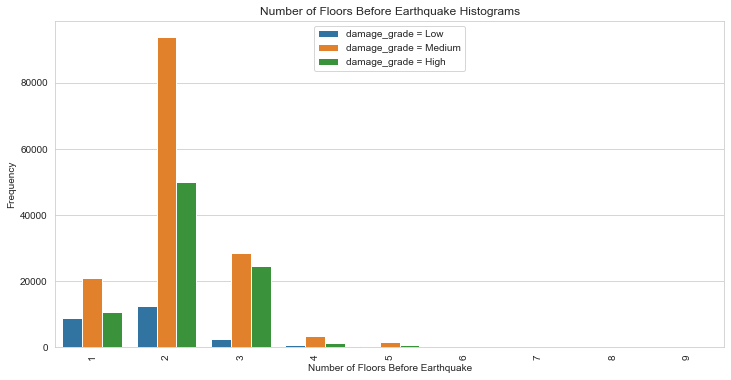

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(df["count_floors_pre_eq"], hue=df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Number of Floors Before Earthquake")
plt.xticks(rotation=90)
plt.title("Number of Floors Before Earthquake Histograms")
plt.legend(["damage_grade = Low","damage_grade = Medium","damage_grade = High"])
plt.show()

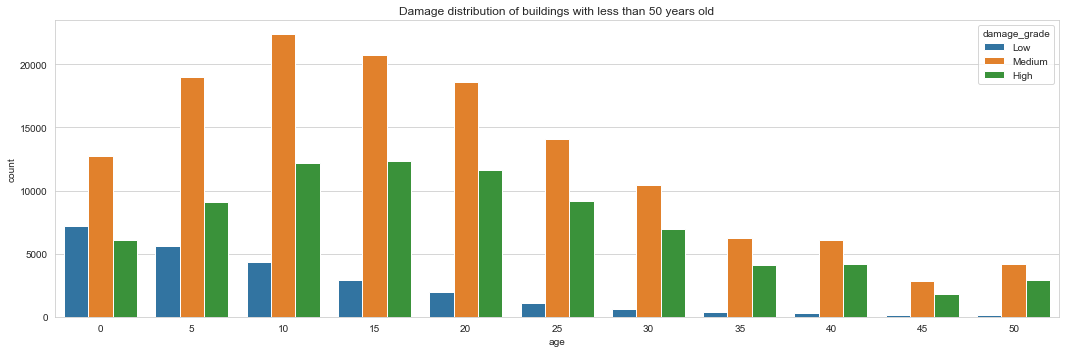

In [18]:
plt.figure(figsize=(18,12))
plt.subplot(211)
plt.title('Damage distribution of buildings with less than 50 years old')
tr=df[df['age']<=50]
sns.countplot(x='age',data=tr,hue='damage_grade')

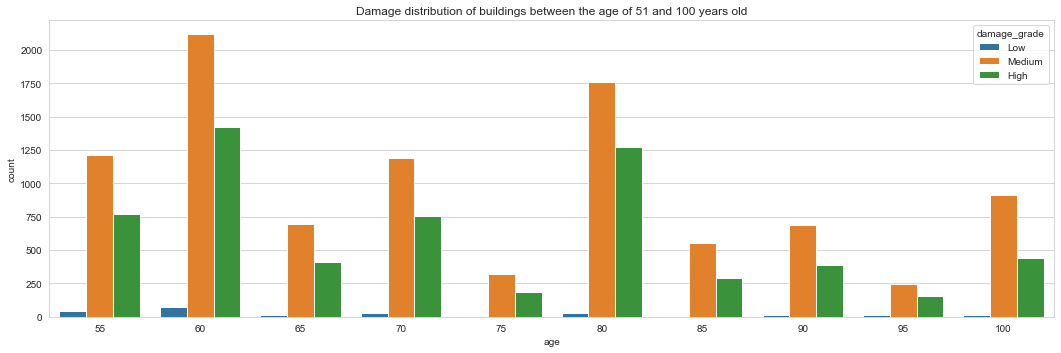

In [19]:

plt.figure(figsize=(18,12))
plt.subplot(211)
plt.title('Damage distribution of buildings between the age of 51 and 100 years old')
tr = df.loc[(df['age'] > 50) & (df['age']<=100)]
sns.countplot(x='age',data=tr,hue='damage_grade')

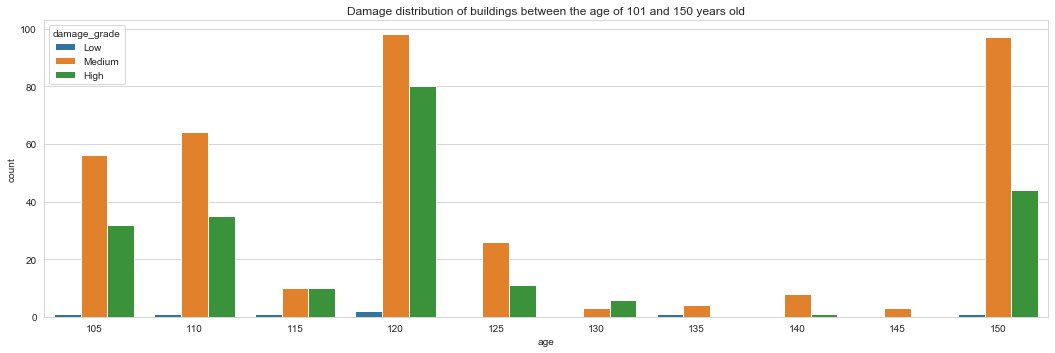

In [20]:
plt.figure(figsize=(18,12))
plt.subplot(211)
plt.title('Damage distribution of buildings between the age of 101 and 150 years old')
tr = df.loc[(df['age'] > 100) & (df['age']<=150)]
sns.countplot(x='age',data=tr,hue='damage_grade')

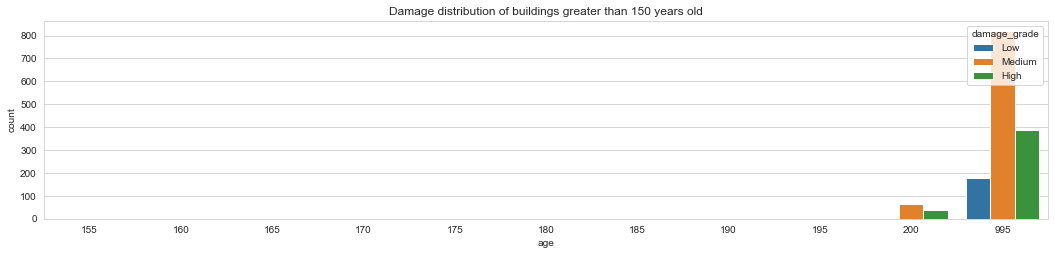

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(211)
plt.title('Damage distribution of buildings greater than 150 years old')
tr=df[df['age']>150]
sns.countplot(x='age',data=tr,hue='damage_grade')

- A significant observation to note from the above chart shows that building with with less than 50 years of age has a dominating damage grade that is medium, with notable increase of damage on buildings between zero to 20 years of age, with a steady decline from 25 years of age to 45 years of age,another interesting observation here is that building with 100 years and 150 years also has a increase in damage grade with severity that is medium. This implies that age has a major factor in determining the level of damage that is going to affeat the building

In [22]:
df_age = df.copy()

In [23]:
for data, row in df_age.iterrows():
    if row.age <= 50:
        df_age.loc[data, 'age'] = '<50'
    elif row.age > 50 and row.age <= 100:
        df_age.loc[data, 'age'] = '51-100'
    elif row.age > 100 and row.age <= 150:
        df_age.loc[data, 'age'] = '100-150'
    elif row.age > 150 :
        df_age.loc[data, 'age'] = '>150'

In [24]:
df_age.age.value_counts()

<50        242457
51-100      16020
>150         1529
100-150       595
Name: age, dtype: int64

In [25]:
pd.crosstab(df_age['damage_grade'],df_age['age'])

age,100-150,51-100,<50,>150
damage_grade,,,,
Low,7,244,24691,182
Medium,369,9682,137300,908
High,219,6094,80466,439


In [26]:
pd.crosstab(df_age['damage_grade'],df_age['age'], normalize=True)*100


age,100-150,51-100,<50,>150
damage_grade,,,,
Low,0.002686,0.093630,9.474637,0.069839
Medium,0.141596,3.715258,52.685907,0.348425
High,0.084037,2.338441,30.877088,0.168457


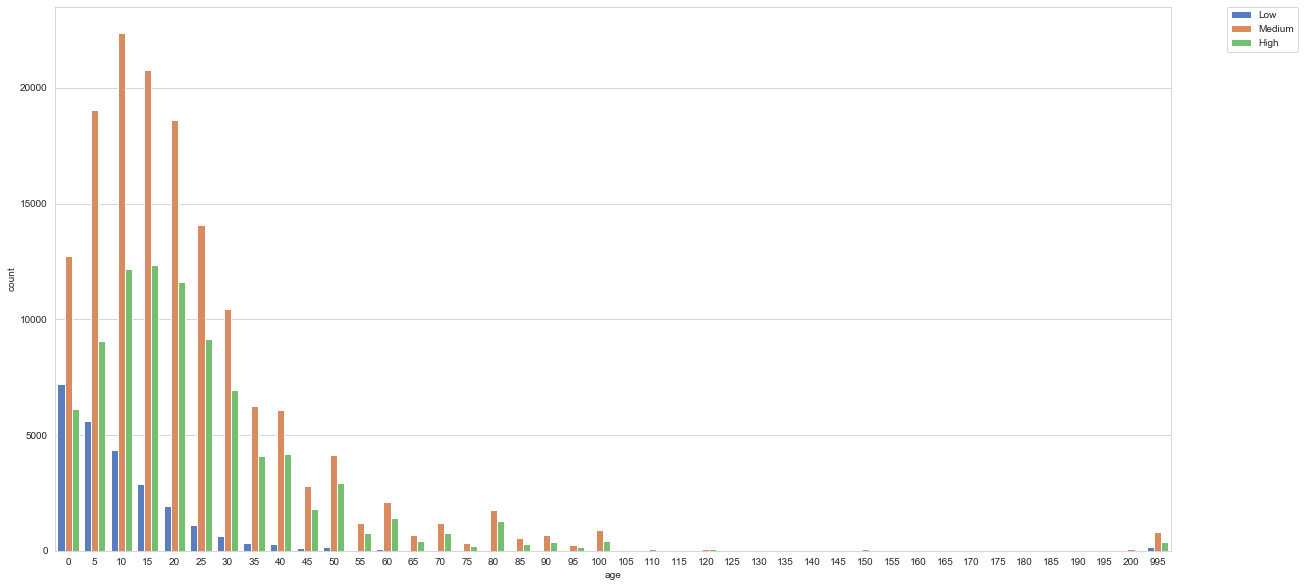

In [27]:

plt.figure(figsize=(20,10))
ax = sns.countplot(x="age", hue="damage_grade", palette="muted",data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

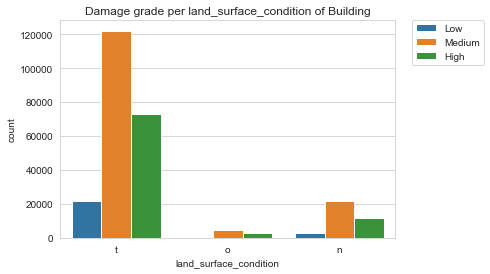

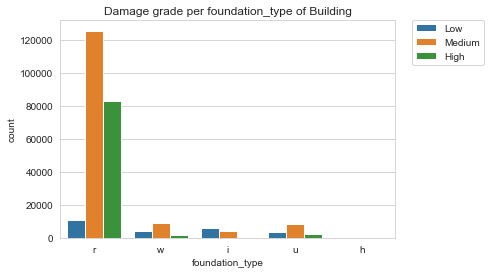

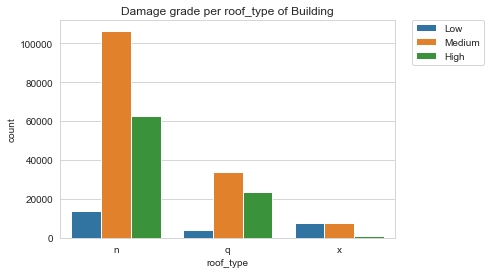

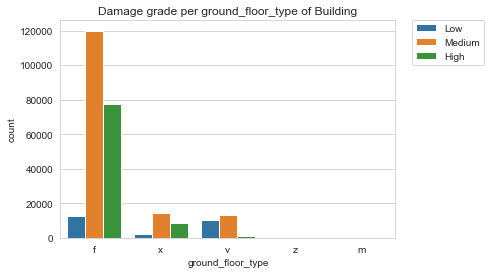

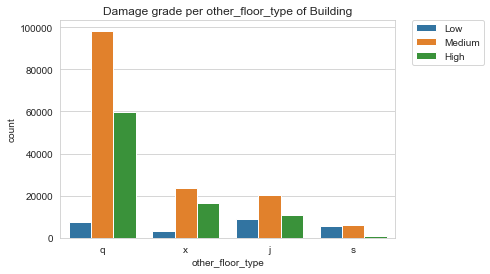

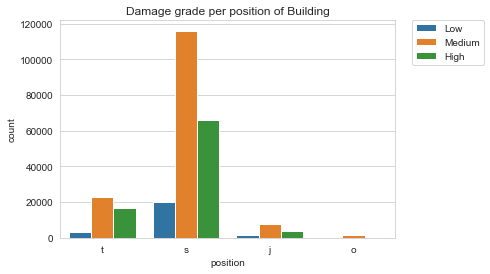

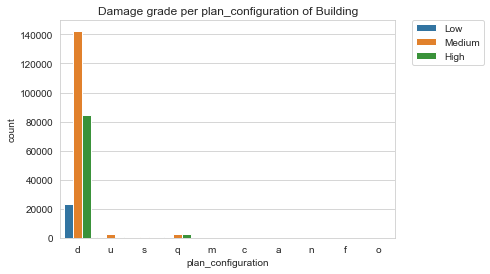

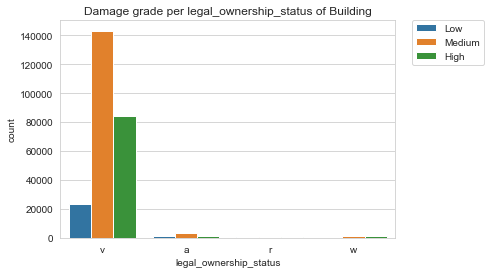

In [28]:

def plot_box(df, cols, col_x = 'damage_grade'):
    for  col in (cols):
    #for col in cols:
        sns.set_style("whitegrid")
        sns.countplot(hue=col_x, x=col, data=df)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('count')# Set text for y axis
        plt.title('Damage grade per ' + str(col)+' of Building')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        

cat_cols = ['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']
plot_box(df, cat_cols)


Notable Insights Looking at the land surface condition of the building, the type T has a significant impact on the severity of damage on the building Looking at the foundation type, we can observe that floor type of the value R has a significant impact on the severity of damage on the building  Also ground floor type of the type F has a significant impact on the level of damage on the building 

Many of the of the findings here are observational as we can see, and it show they are going to have a significant impact when building our model

**Other variables explored with the dependent variable**


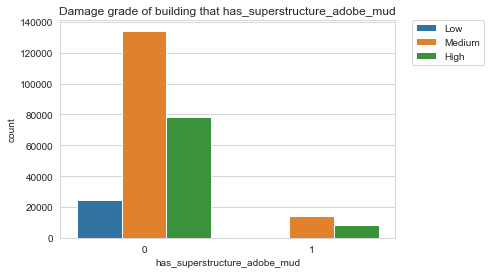

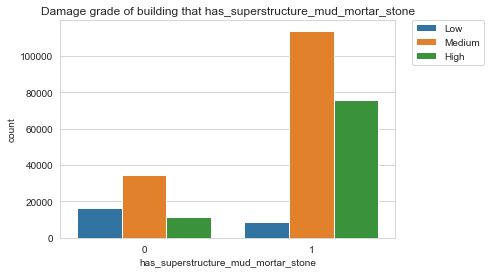

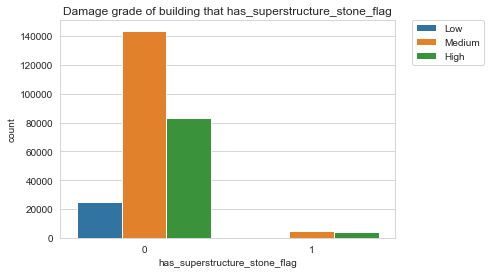

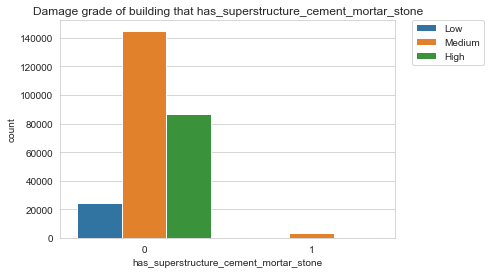

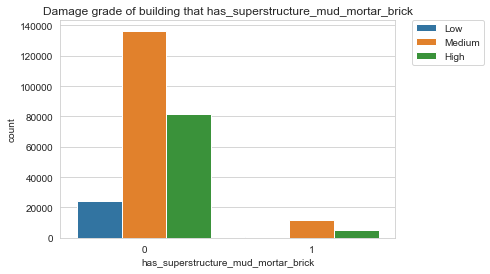

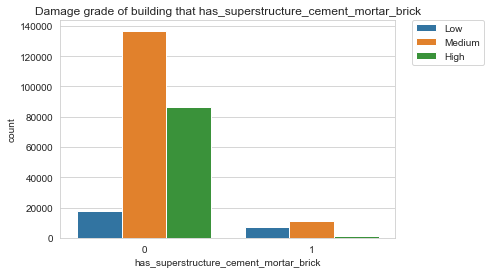

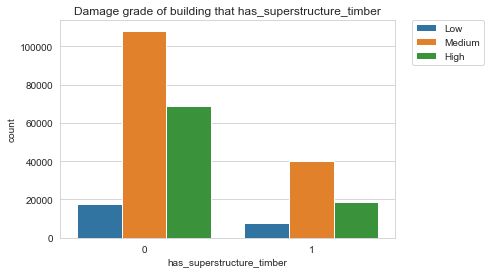

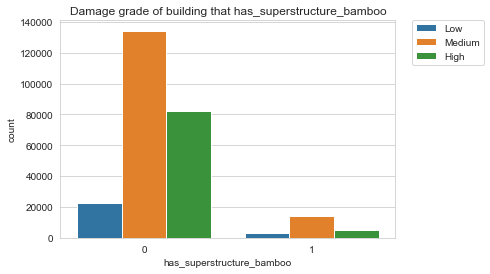

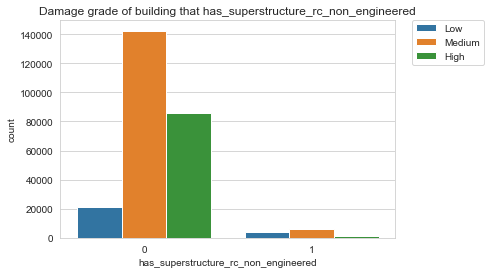

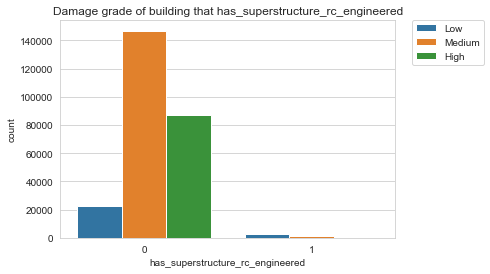

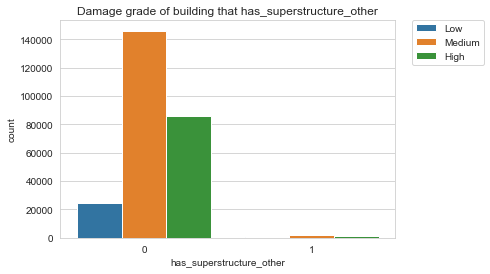

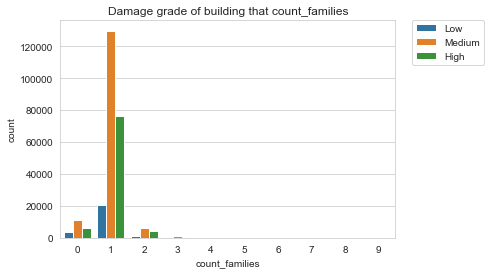

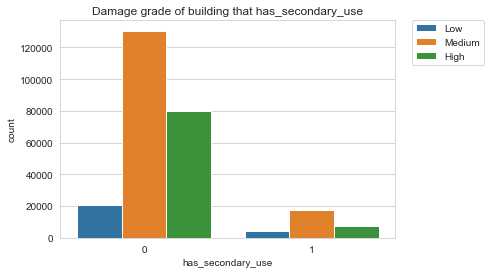

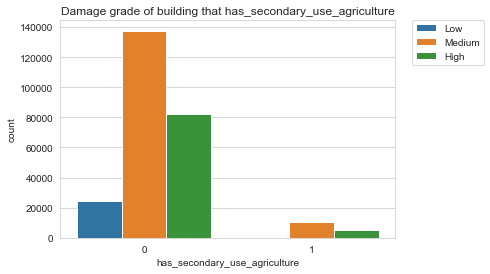

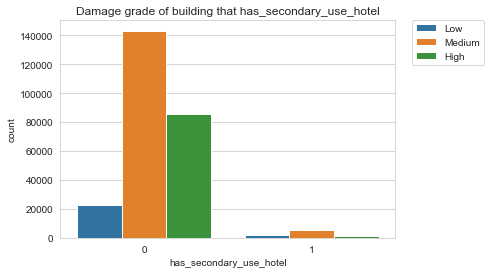

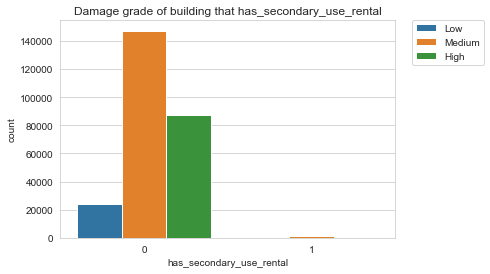

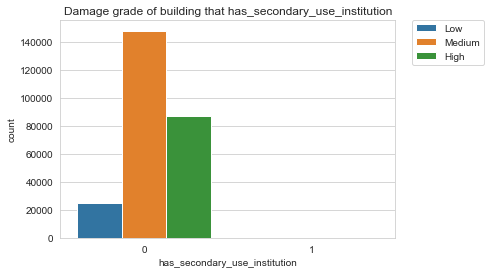

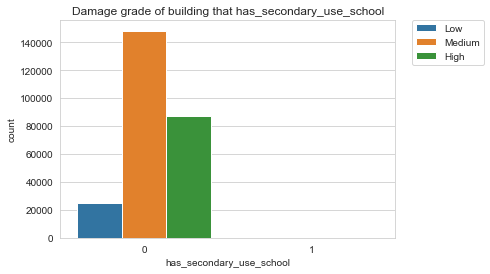

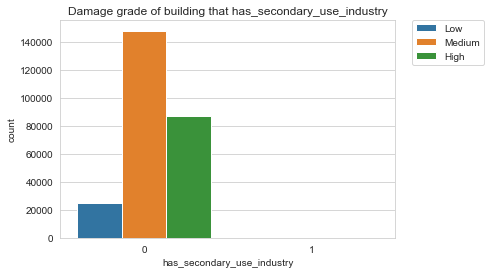

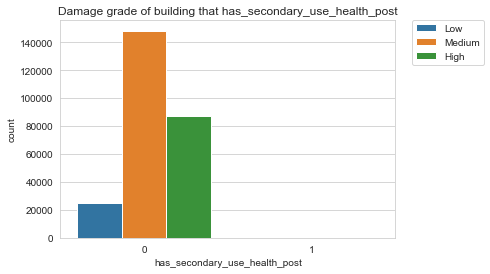

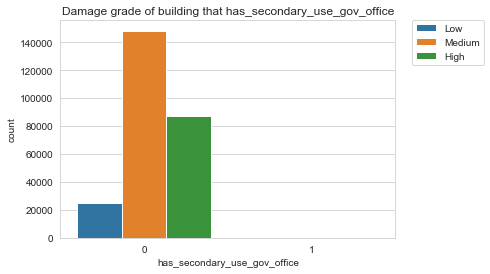

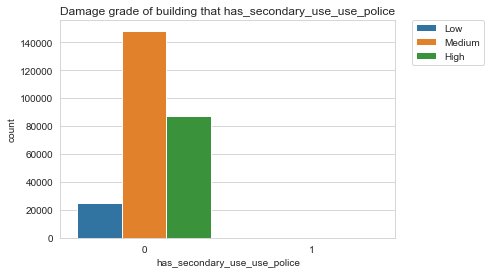

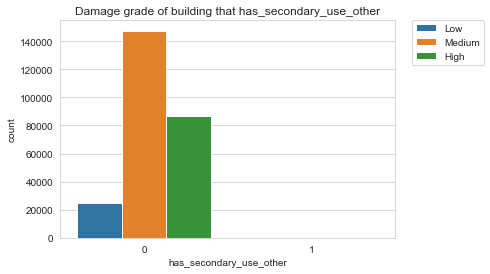

In [29]:
def plot_box(df, cols, col_x = 'damage_grade'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.countplot(hue=col_x, x=col, data=df)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('count')# Set text for y axis
        plt.title('Damage grade of building that ' + str(col))
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        

cat_num_cols = ['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag',
                             'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',
                             'has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered',
                             'has_superstructure_rc_engineered','has_superstructure_other','count_families','has_secondary_use',
                             'has_secondary_use_agriculture','has_secondary_use_hotel','has_secondary_use_rental','has_secondary_use_institution',
                             'has_secondary_use_school','has_secondary_use_industry','has_secondary_use_health_post',
                             'has_secondary_use_gov_office','has_secondary_use_use_police','has_secondary_use_other']
plot_box(df, cat_num_cols)

**Multivariant Analysis**

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int64   
 2   geo_level_2_id                          260601 non-null  int64   
 3   geo_level_3_id                          260601 non-null  int64   
 4   count_floors_pre_eq                     260601 non-null  int64   
 5   age                                     260601 non-null  int64   
 6   area_percentage                         260601 non-null  int64   
 7   height_percentage                       260601 non-null  int64   
 8   land_surface_condition                  260601 non-null  object  
 9   foundation_type                         260601 non-null  object  
 10  roof_type                       

In [31]:
features=df[['damage_grade','geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']]

In [32]:
corr_matrix=features.corr()
corr_matrix

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
geo_level_1_id,1.000000,-0.061405,0.002718,-0.089364,-0.003908,0.071158,-0.063474,-0.018245,-0.152038,0.007677,0.023656,-0.028854,0.134121,0.144985,0.074169,0.016454,0.015767,0.022670,0.035108,-0.010428,-0.019786,0.001911,0.023523,0.003700,0.002977,0.002655,-0.002303,0.001060,0.000523,-0.017992
geo_level_2_id,-0.061405,1.000000,0.000921,0.047730,0.012594,-0.049443,0.035516,0.015833,0.076491,-0.008743,-0.009122,0.014246,-0.079875,-0.023927,-0.032588,-0.038173,-0.036074,-0.020144,-0.012439,-0.001519,0.017522,-0.008439,-0.030704,-0.004840,-0.004856,0.000687,-0.000757,-0.000152,0.001926,-0.013068
geo_level_3_id,0.002718,0.000921,1.000000,-0.021646,-0.006385,-0.005643,-0.024507,-0.015732,0.026294,0.019579,0.005966,-0.023278,-0.005116,-0.003916,0.006143,0.002265,-0.012420,-0.010604,-0.002479,0.007375,0.015995,-0.002001,-0.007356,-0.007058,-0.004373,-0.000862,-0.002632,-0.000943,0.000269,-0.002463
count_floors_pre_eq,-0.089364,0.047730,-0.021646,1.000000,0.086668,0.101071,0.772734,0.174852,-0.027116,-0.041058,-0.011329,0.257279,-0.085821,-0.056637,-0.070487,0.007448,0.049000,-0.029888,0.086586,0.052125,-0.005294,0.077120,0.035425,0.016384,0.008833,-0.002611,0.006786,0.009639,0.003939,-0.002073
age,-0.003908,0.012594,-0.006385,0.086668,1.000000,-0.004323,0.061074,0.068032,0.001321,0.009129,-0.012128,0.079525,-0.036992,0.005855,-0.008374,-0.025431,-0.025552,-0.001520,0.005309,-0.008788,-0.002194,-0.010021,0.001193,-0.004189,-0.003514,-0.003658,-0.002169,-0.001764,-0.001195,-0.004534
area_percentage,0.071158,-0.049443,-0.005643,0.101071,-0.004323,1.000000,0.196645,0.026287,-0.225541,-0.000473,0.073701,0.053362,0.210800,-0.053965,-0.031641,0.185047,0.224647,0.007928,0.088630,0.122401,-0.016478,0.159885,0.105983,0.052212,0.050164,0.019421,0.015109,0.015290,0.004983,0.013111
height_percentage,-0.063474,0.035516,-0.024507,0.772734,0.061074,0.196645,1.000000,0.149725,-0.106573,-0.020260,0.012960,0.209098,0.001698,-0.052402,-0.063342,0.086228,0.129698,-0.019266,0.064316,0.091780,-0.005390,0.123551,0.068909,0.031366,0.020032,0.001946,0.011192,0.014660,0.004048,0.005397
has_superstructure_adobe_mud,-0.018245,0.015833,-0.015732,0.174852,0.068032,0.026287,0.149725,1.000000,-0.306861,0.006962,-0.014554,0.314979,-0.037549,0.011694,0.011528,-0.036830,-0.036782,0.057545,0.033068,-0.013300,-0.003917,-0.012642,-0.003935,-0.004281,-0.002369,0.001762,-0.003292,-0.002648,-0.001493,-0.010074
has_superstructure_mud_mortar_stone,-0.152038,0.076491,0.026294,-0.027116,0.001321,-0.225541,-0.106573,-0.306861,1.000000,-0.034046,-0.104288,-0.376208,-0.470715,-0.040177,-0.054657,-0.222366,-0.224509,-0.041705,0.001576,-0.087520,0.058261,-0.159532,-0.117948,-0.036064,-0.023070,-0.025507,-0.008763,-0.011904,-0.003380,0.005628
has_superstructure_stone_flag,0.007677,-0.008743,0.019579,-0.041058,0.009129,-0.000473,-0.020260,0.006962,-0.034046,1.000000,0.037307,-0.033348,-0.043729,0.125311,0.078466,0.008448,-0.021406,0.065732,0.004564,-0.001738,0.010563,-0.008868,-0.011632,-0.000971,-0.001362,-0.004240,-0.002586,0.002959,0.000472,0.002127


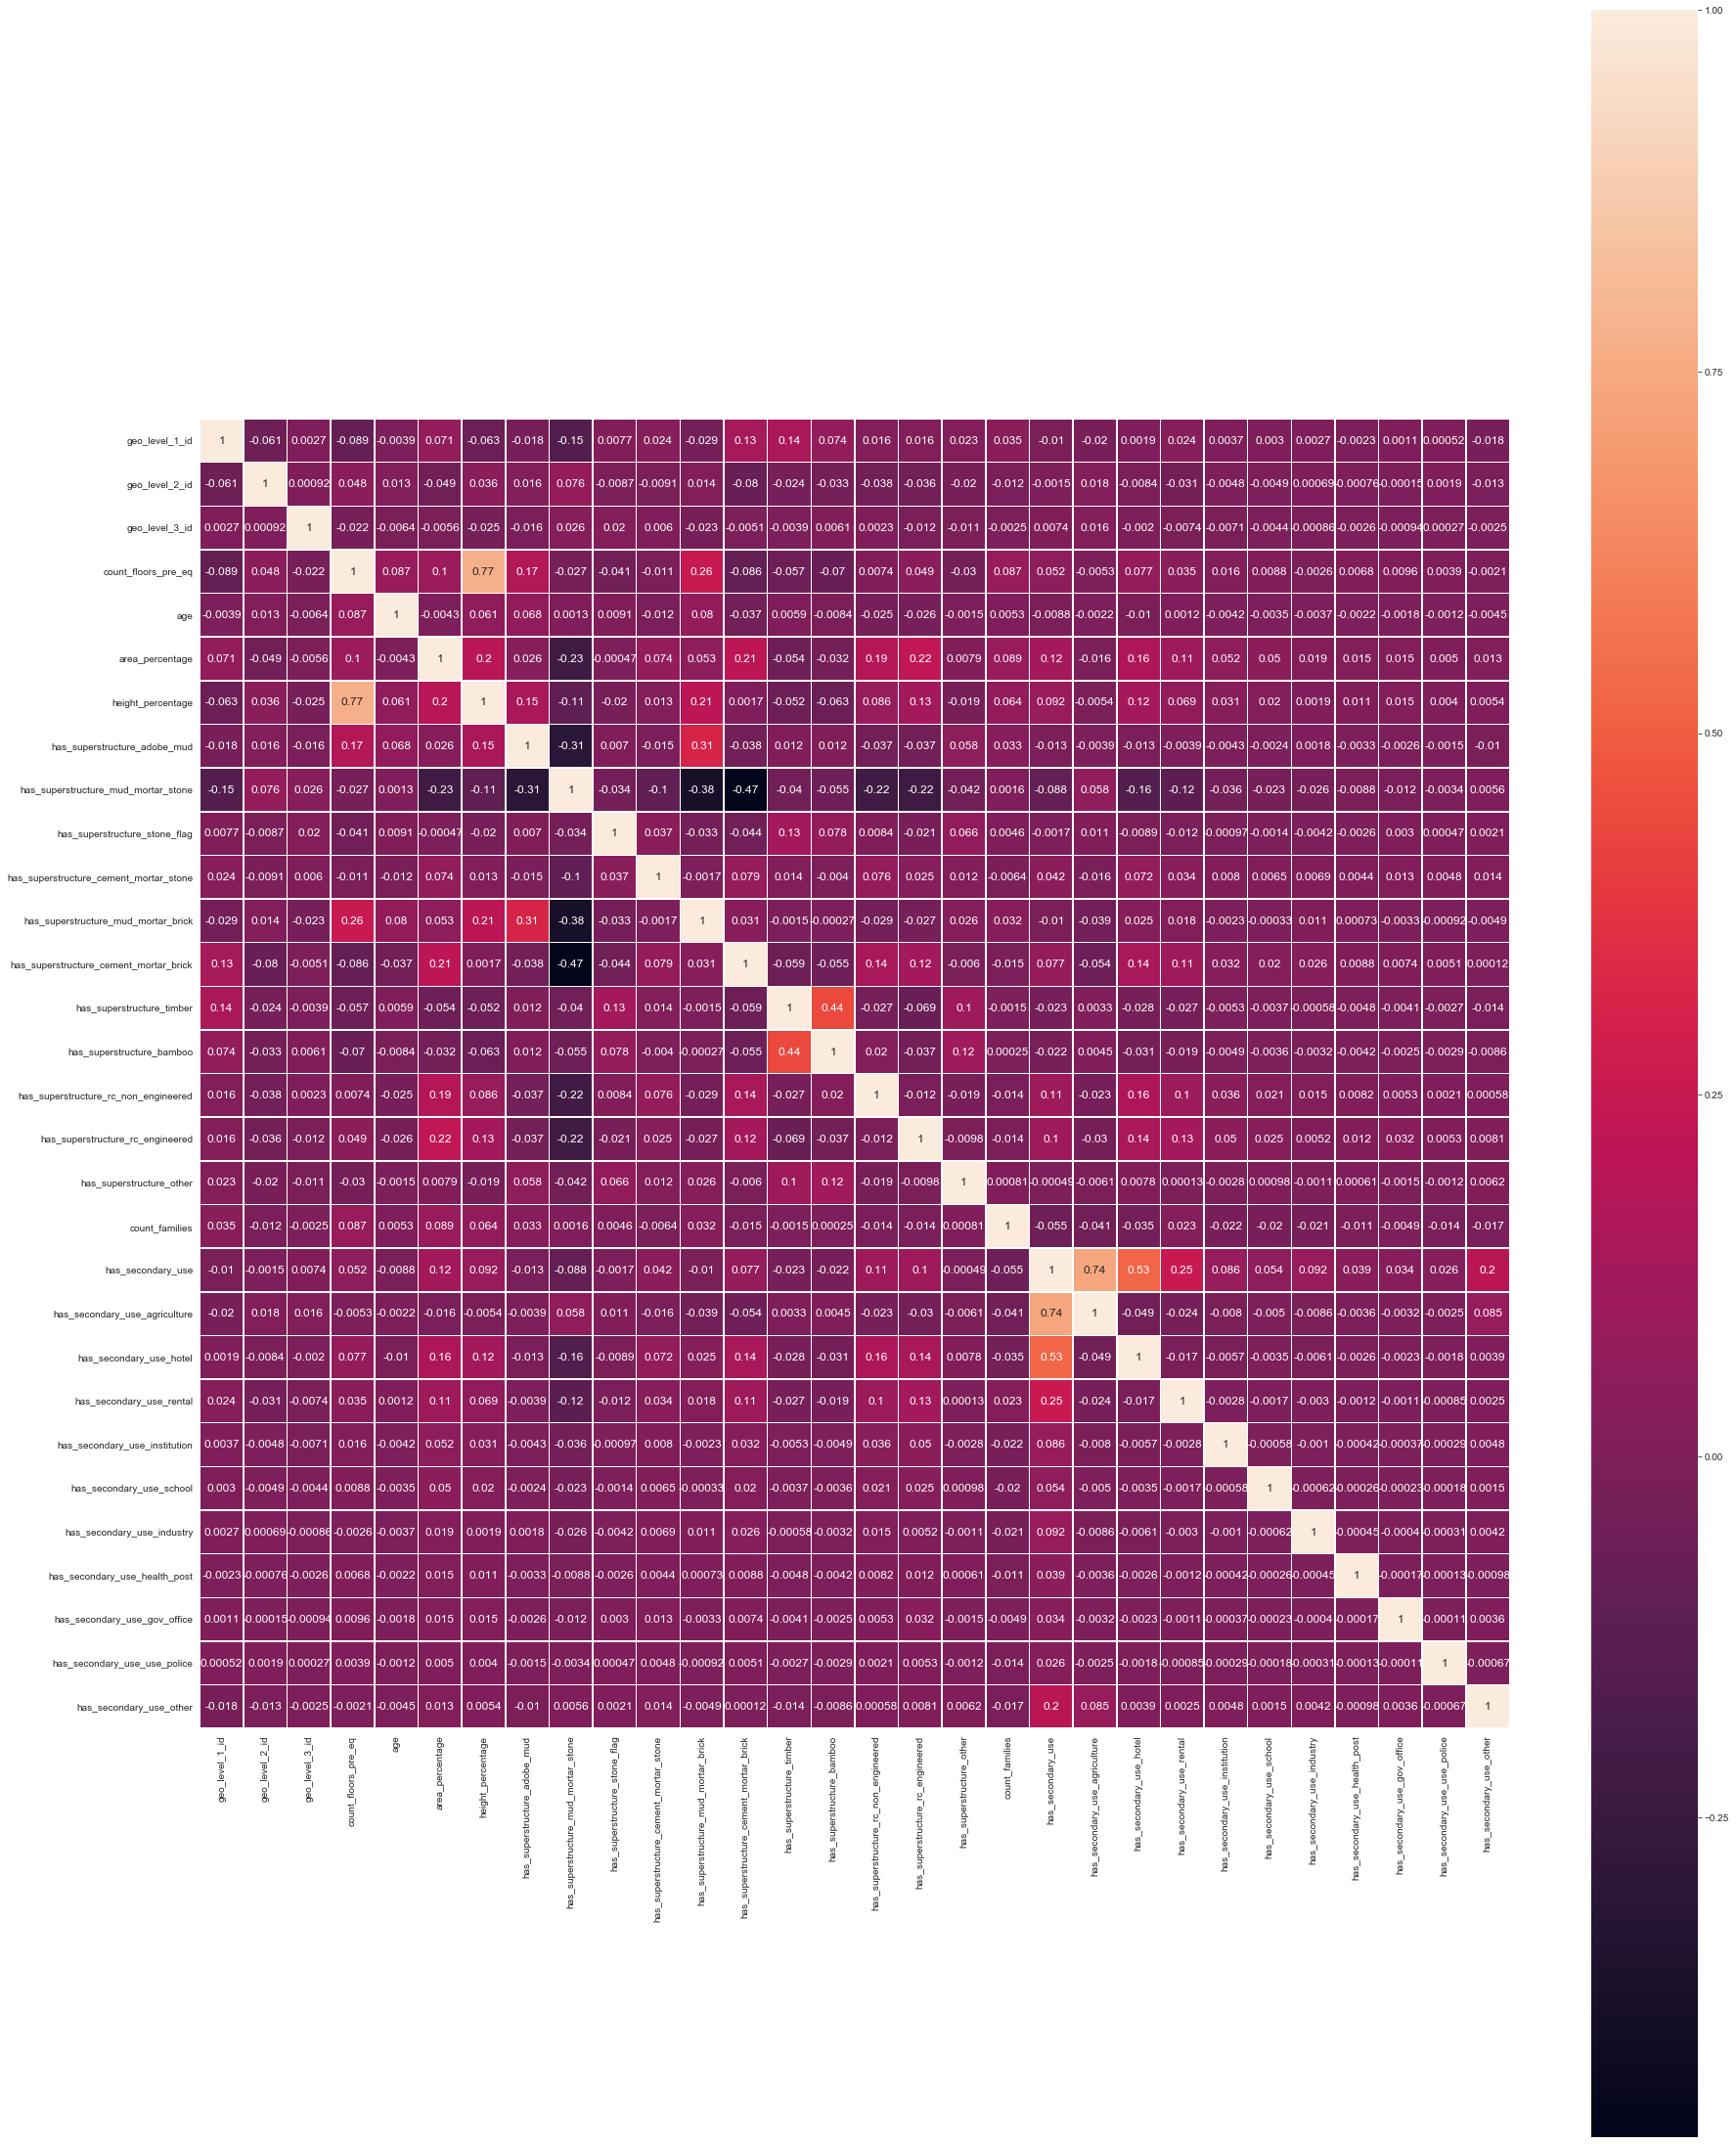

In [33]:
f, ax = plt.subplots(figsize=(30, 40))
sns.heatmap(corr_matrix,
            linewidths = .5,
            square = True,
            annot = True,
            annot_kws = {'size': 12})

In [34]:

# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(df, 0.6)
print('correlated features: ', len(set(corr_features)) )


correlated features:  2


In [35]:
corr_features


{'has_secondary_use_agriculture', 'height_percentage'}

Form the correclation matrix we can see that 'has_secondary_use_agriculture' and 'height_percentage' is highly correlated. We can either drop both or one of them but we cant keep both when building our model

In [36]:
#lets look at the distribution of the target varable- damage grade
df.damage_grade.value_counts(normalize=True)*100

Medium    56.891186
High      33.468022
Low        9.640792
Name: damage_grade, dtype: float64

In [37]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [38]:
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
building_id,building_id,0.0
has_superstructure_bamboo,has_superstructure_bamboo,0.0
has_superstructure_rc_non_engineered,has_superstructure_rc_non_engineered,0.0
has_superstructure_rc_engineered,has_superstructure_rc_engineered,0.0
has_superstructure_other,has_superstructure_other,0.0
legal_ownership_status,legal_ownership_status,0.0
count_families,count_families,0.0
has_secondary_use,has_secondary_use,0.0
has_superstructure_timber,has_superstructure_timber,0.0
has_secondary_use_agriculture,has_secondary_use_agriculture,0.0


In [39]:
# Fill Categorical columns with Missing
for col in df.select_dtypes(include=['object']):
    df[col].replace(np.nan, 'Null', inplace=True)
    
for col in df.select_dtypes(include=['int64', 'float64']):
    df[col].replace(np.nan, -999, inplace=True)

In [40]:
df=df.drop(['building_id','has_secondary_use_agriculture'], axis=1)


# Machine Learning

In [41]:
# for preprocessing the data
from sklearn.preprocessing import StandardScaler

# for imbalance data
from imblearn.over_sampling import SMOTE

# the model
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler

# for combining the preprocess with model training
from imblearn.pipeline import make_pipeline as imb_make_pipeline

# for optimizing the hyperparameters of the pipeline
from sklearn.model_selection import GridSearchCV

In [42]:
scaler = StandardScaler()

col = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'age', 'area_percentage','count_floors_pre_eq' ,'height_percentage']

features = df[col]
features = scaler.fit_transform(features.values)
df[col] = features

In [43]:
X = pd.get_dummies(df.drop('damage_grade', axis=1))
y = df.damage_grade

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)


**training model**

In [45]:
forest = RandomForestClassifier()
pip_smote = imb_make_pipeline(RobustScaler(),
                              SMOTE(),
                              forest)
scores = cross_val_score(pip_smote,
                         X_train, y_train,
                         scoring="f1_micro", cv=2)

C:\Users\Rendy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Rendy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [46]:
scores

array([0.65387947, 0.65041827])

In [47]:
print(f"Random Forest model's average f1: {scores.mean():.3f}")

Random Forest model's average f1: 0.652


In [48]:
ada = AdaBoostClassifier()
pip_smote = imb_make_pipeline(RobustScaler(),
                              SMOTE(),
                              ada)
scores_ada = cross_val_score(pip_smote,
                         X_train, y_train,
                         scoring="f1_micro", cv=2)

In [49]:
scores_ada

array([0.53772023, 0.56487847])

In [50]:
print(f"Adaboost model's average f1: {scores_ada.mean():.3f}")

Adaboost model's average f1: 0.551


In [51]:
gradient = GradientBoostingClassifier()
pip_smote = imb_make_pipeline(RobustScaler(),
                              SMOTE(),
                              gradient)
scores_gradient = cross_val_score(pip_smote,
                         X_train, y_train,
                         scoring="f1_micro", cv=2)

In [52]:
scores_gradient

array([0.65517317, 0.65390477])

In [53]:
print(f"Gradient model's average f1: {scores_gradient.mean():.3f}")

Gradient model's average f1: 0.655


In [54]:
knn = KNeighborsClassifier()
pip_smote = imb_make_pipeline(RobustScaler(),
                              SMOTE(),
                              knn)
scores_knn = cross_val_score(pip_smote,
                         X_train, y_train,
                         scoring="f1_micro", cv=2)

In [55]:
scores_knn

array([0.53918935, 0.53988093])

In [56]:
svc = SVC()
pip_smote = imb_make_pipeline(RobustScaler(),
                              SMOTE(),
                              svc)
scores_svc = cross_val_score(pip_smote,
                         X_train, y_train,
                         scoring="f1_micro", cv=2)

C:\Users\Rendy\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KeyboardInterrupt: 

In [ ]:
scores_svc

In [ ]:
tree = DecisionTreeClassifier()
pip_smote = imb_make_pipeline(RobustScaler(),
                              SMOTE(),
                              tree)
scores_tree = cross_val_score(pip_smote,
                         X_train, y_train,
                         scoring="f1_micro", cv=2)

In [ ]:
scores_tree